In [1]:
from simulator import *
from algorithms import *
from algorithms_2 import *
from MCTS import *

In [2]:
lava_maze = """
-----------------
|..L....L....L..|
|..L..LLL..L.LL.|
|..L..L.......L.|
|.....L.....L...|
|..L....L....L..|
|..LLL..L.LLLL..|
|..L.L..L..L....|
|..L....L....L..|
|.....L.....L...|
-----------------
"""

simple_room = """
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............

"""

In [3]:
map = make_map(map_str=simple_room, n_apples=5, seed=time.time())
print(map)

Placing 5 apples between (1, 2) and (14, 8)
Placed apple at: (12, 2)
Placed apple at: (10, 2)
Placed apple at: (7, 5)
Placed apple at: (12, 3)
Placed apple at: (8, 2)

MAZE: "mylevel", ' '
FLAGS:hardfloor
INIT_MAP: solidfill,' '
GEOMETRY:center,center
MAP
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
ENDMAP
REGION:(0,0,15,10),lit,"ordinary"
BRANCH:(1,1,1,1),(0,0,0,0)
OBJECT:('%',"apple"),(12, 2)
OBJECT:('%',"apple"),(10, 2)
OBJECT:('%',"apple"),(7, 5)
OBJECT:('%',"apple"),(12, 3)
OBJECT:('%',"apple"),(8, 2)
STAIR:(13, 8),down



In [4]:
env = create_env(map, apple_reward=0.75, penalty_time=-0.1)
env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a neutral human Caveman.              
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                ...............                                 
                                .@.............                                 
                                ........%.%.%..                                 
                                ............%..                                 
                           

KeyboardInterrupt: 

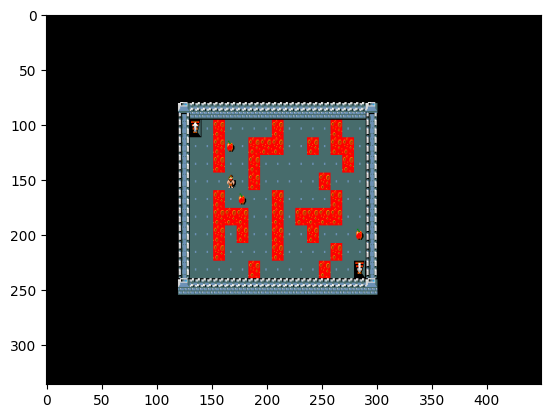

In [5]:
# A star with bonus to tiles that have apples nearby
simulate_with_heuristic(env, a_star_apple, h=manhattan_distance, apple_bonus=3)

Action taken: LEFT
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 1.7500000000000004
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                 @*                                            
                                  *                                            
                                  *************                   

1.7500000000000004

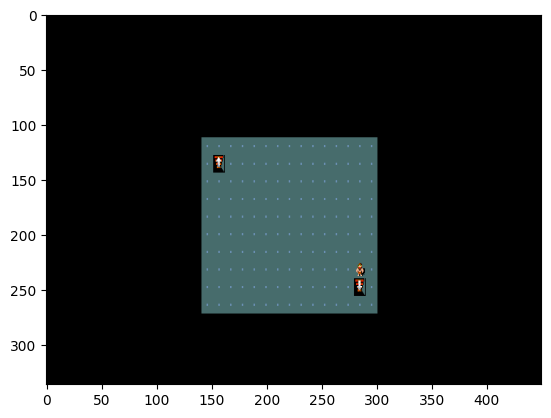

In [ ]:
# A* with modified heuristic that considers the distance to apples then stairs
simulate_with_heuristic(env, a_star_collect_apples, weight=1)

Action taken: RIGHT
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 1.35
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                 @*******                                      
                                        *****                                  
                                          ***                                  

1.35

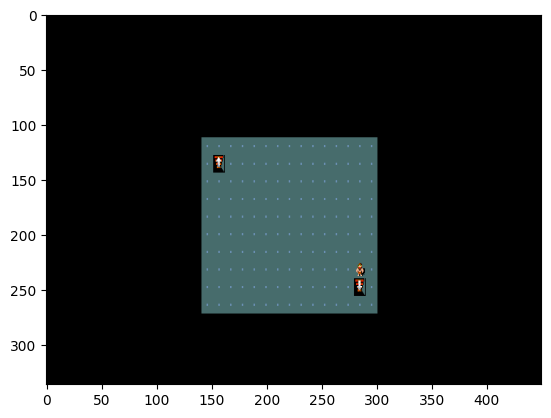

In [5]:
# Monte Carlo with Random
simulate_with_heuristic(
    env, mcts, iterations=50000
)

Action taken: LEFT
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                ...............                                
                                .@.............                                
                                .*.............                                
                                .**............                                
                                ..*.**.........                                
                     

0.44999999999999907

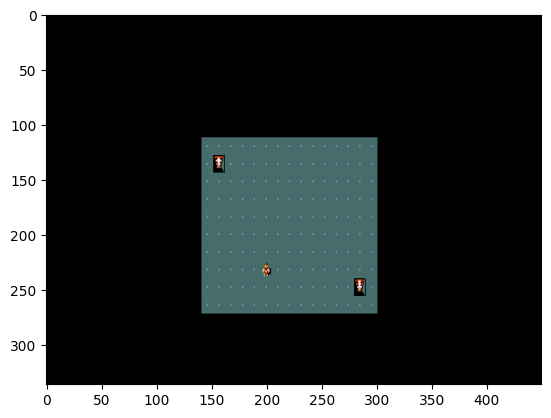

In [ ]:
# Monte Carlo Tree Search with heuristic
simulate_with_heuristic(
    env, mcts, iterations=50000, policy=heuristic_rollout_policy,
)

Action taken: LEFT
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: -0.5500000000000006
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                 @*******                                      
                                        **                                     
                                       *******                   

-0.5500000000000006

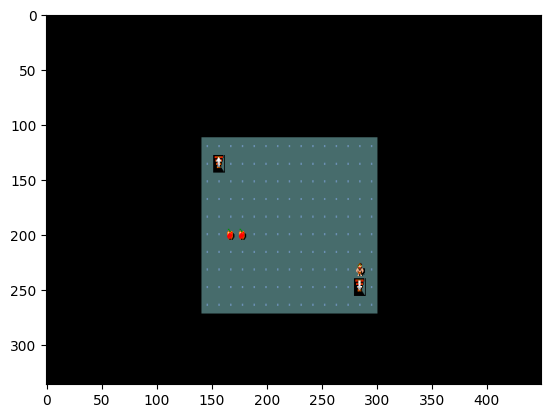

In [ ]:
# Beam Search
simulate_with_heuristic(
    env, beam_search_path_planner, apple_reward=7.5,
    beam_width=5
)

Action taken: DOWN
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 1.0500000000000003
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                 @                                             
                                 *************                                 
                                           ****                   

1.0500000000000003

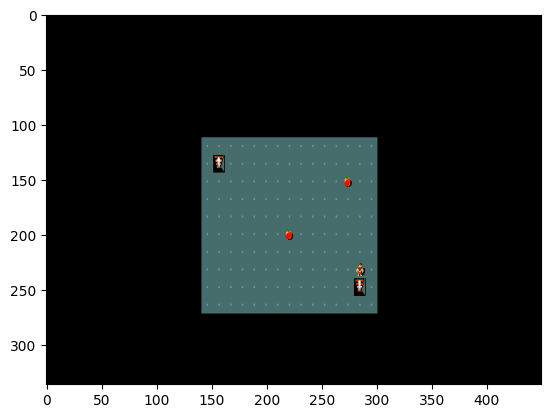

In [6]:
# Potential fields
simulate_with_heuristic(
    env, potential_field_path
)